# Data Mining Lab 1
## Homework #1
### Edgar Duron (IMBA) - 106077490

## Part 1

---

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [5]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target

In [7]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---

### Exercise 2

In [8]:
X.sort_index().loc[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [9]:
X.loc[X['category'] > 1][0:8]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


Found two interesting querying techniques to play with and each has its insights to be considered useful. The first 'sort_index' sorts by their index and organized; the second 'loc' shows the first # (in this case 9) results bigger than any specified number.

---

### Exercise 5

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [11]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

The reason why we get 'NaN' (float value: only string) when performing 'np.nan' is because the result is a number. NaN and None demonstrate as empty data since they don't comply with its purpose.

---

### Exercise 6

Seems like all the order is random every time you try, way too random (sorted on weird ways). But, by sampling with a normal state of X the sample is in order.


---

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

---

### Exercise 8

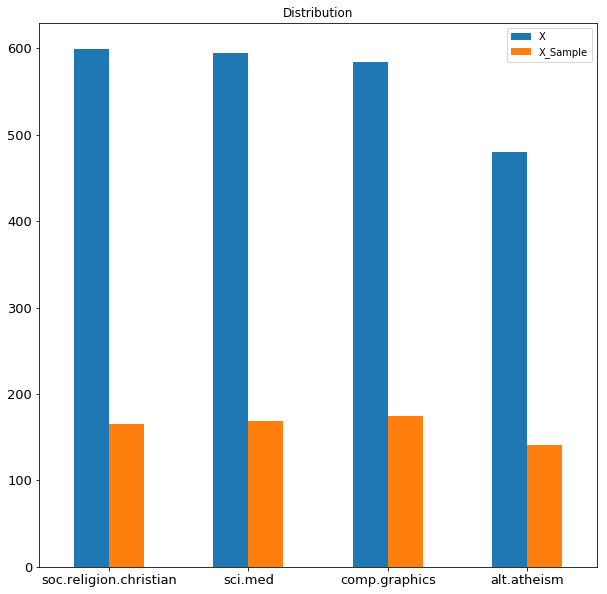

In [13]:
X_sample = X.sample(n=650)

graph_df = X.category_name.value_counts().rename('X').to_frame()\
.join(X_sample.category_name.value_counts().rename('X_Sample').to_frame())

graph_df.plot(kind = 'bar', figsize=(10, 10), rot = 0, fontsize = 13, title = 'Distribution')

In [14]:
import nltk

In [15]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

---

### Exercise 10

In [17]:
O = count_vect.inverse_transform(X_counts[4:5, 0:100].toarray())
O

[array(['00', '01'], dtype='<U80')]

Going throughly through the documentation finally found 'inverse_transform' that outputs what we expect (huge struggle trying to find this little piece of code, tried so many methods).

In [18]:
import seaborn as sns

---

### Exercise 11

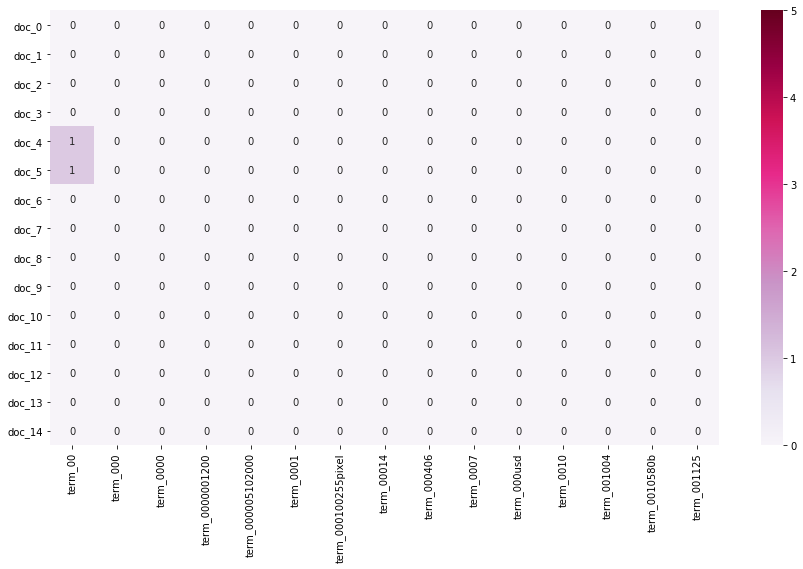

In [19]:
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names()[0:15]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:15]]
plot_z = X_counts[0:15, 0:15].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 8))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

---

In [20]:
from sklearn.decomposition import PCA

In [21]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

---

### Exercise 12

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

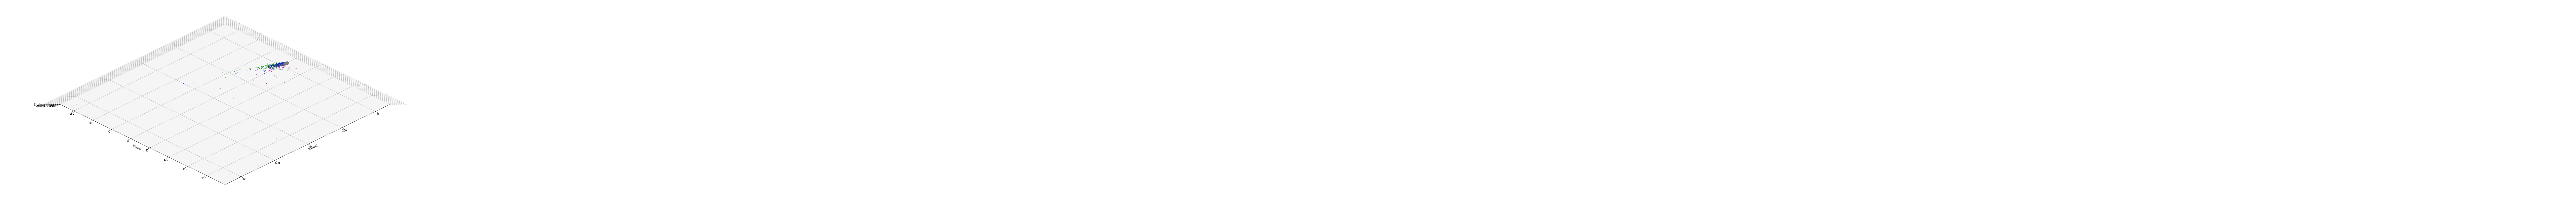

In [23]:
Dim = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize = (30,15))
ax = fig.add_subplot(111, projection='3d')

col = ['blue', 'green', 'grey', 'm']

for c, category in zip(col, categories):
    x = Dim[X['category_name'] == category].T[0]
    y = Dim[X['category_name'] == category].T[1]
    z = Dim[X['category_name'] == category].T[2]
    
    ax.scatter(x, y, z, c = c, marker = '2')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(90, 45)

plt.show()

---

### Exercise 13

In [24]:
import matplotlib.pyplot as plt
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import plotly.graph_objs as go

In [25]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [26]:
def plot_word_frequency (word_list, plot_title): 
    
    trace1 = { 
    "x": list(word_list[0]), 
    "y": list(word_list[1]), 
    "type": "bar"
    }
    
    data = go.Data([trace1]) 

    layout = { 
    "title" : plot_title,
    "yaxis" : {"title":"Frequency"}
    }

    fig = go.Figure(data = data, layout = layout)  
    return fig

py.offline.iplot(plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution (All)"))

C:\Users\alexd\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

### Exercise 14

In [27]:
source_dataset = pd.DataFrame({'fn': count_vect.get_feature_names(), 'frequent': term_frequencies})

In [28]:
decrease_dataset = source_dataset[source_dataset['frequent'] > 1200]

def plot_word_frequency (word_list, plot_title):
    
    trace1 = { 
    "x": list(word_list[0]), 
    "y": list(word_list[1]), 
    "type": "bar"
    }
    
    data = go.Data([trace1]) 

    layout = { 
    "title" : plot_title,
    "yaxis" : {"title":"Frequency"}
    }

    fig= go.Figure (data = data, layout = layout)  
    return fig

py.offline.iplot(plot_word_frequency([decrease_dataset['fn'],decrease_dataset['frequent']], "Term Frequency Distribution"))

C:\Users\alexd\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

### Exercise 15

In [29]:
sortof_df = decrease_dataset.sort_values(by = 'frequent', ascending=False)

def plot_word_frequency (word_list, plot_title): 
    
    trace1 = { 
    "x": list(word_list[0]), 
    "y": list(word_list[1]), 
    "type": "bar"    
    }
    
    data = go.Data([trace1]) 

    layout = { 
    "title" : plot_title,
    "yaxis" : {"title":"Frequency"}
    }

    fig = go.Figure (data = data, layout = layout)  
    return fig

py.offline.iplot(plot_word_frequency([sortof_df['fn'],sortof_df['frequent']], "Term Frequency Distribution"))

C:\Users\alexd\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

In [30]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [31]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [32]:
mlb = preprocessing.LabelBinarizer()

### Exercise 16

In [33]:
mlb.fit(X.category_name)

X['newbinarization_category'] = mlb.transform(X['category_name']).tolist()  

X[0:5] 

,text,category,category_name,unigrams,newbinarization_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"


---

## Part 2

### Data preparation

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords 
import os

In [35]:
print(os.getcwd())

C:\Users\alexd\Desktop\Data Mining 1st HW\Edgar_106077490_HW1


In [40]:
txt = pd.read_csv('amazon_cells_labelled.txt', header = None,sep = '\t')
txt = txt.append(pd.read_csv('imdb_labelled.txt', header = None, sep = '\t'))
txt = txt.append(pd.read_csv('yelp_labelled.txt', header  = None, sep = '\t'))

In [41]:
txt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 999
Data columns (total 2 columns):
0    2748 non-null object
1    2748 non-null int64
dtypes: int64(1), object(1)
memory usage: 64.4+ KB


In [42]:
txt.columns = ['sentiment','score']
txt.columns

Index(['sentiment', 'score'], dtype='object')

In [43]:
len(txt)

2748

### Operations

In [44]:
txt.loc[::, 'sentiment'][0:21]

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
11    He was very impressed when going from the orig...
12    If the two were seperated by a mere 5+ ft I st...
13                             Very good quality though
14    The design is very odd, as the ear "clip" is n...
15    Highly recommend for any one who has a blue to...
16                  I advise EVERYONE DO NOT BE FOOLED!
17                                     So Far So

In [45]:
txt.isnull()

,sentiment,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [46]:
txt.isnull().apply(lambda X: dmh.check_missing_values(X))

sentiment    (The amoung of missing records is: , 0)
score        (The amoung of missing records is: , 0)
dtype: object

In [47]:
txt.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 2748, dtype: bool

In [53]:
sum(txt.duplicated())

17

In [54]:
txt['txt length']=txt['sentiment'].apply(len)
txt.head() 

,sentiment,score,txt length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


In [61]:
txt['letter count'] = txt['sentiment'].apply(len)
txt[0:10]

,sentiment,score,txt length,letter count
0,So there is no way for me to plug it in here i...,0,82,82
1,"Good case, Excellent value.",1,27,27
2,Great for the jawbone.,1,22,22
3,Tied to charger for conversations lasting more...,0,79,79
4,The mic is great.,1,17,17
5,I have to jiggle the plug to get it to line up...,0,74,74
6,If you have several dozen or several hundred c...,0,111,111
7,If you are Razr owner...you must have this!,1,43,43
8,"Needless to say, I wasted my money.",0,35,35
9,What a waste of money and time!.,0,32,32


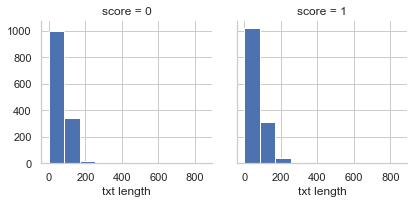

In [62]:
ax=sns.FacetGrid(txt, col='score')
ax.map(plt.hist,'txt length', range=[0,850] )

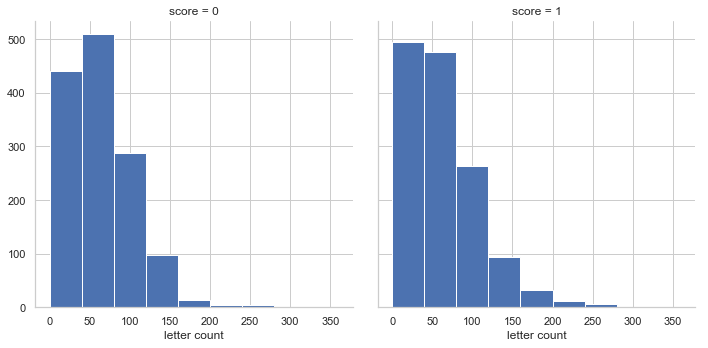

In [63]:
sns.set(style="whitegrid")
bins = np.arange(0, 400, 40)
ax = sns.FacetGrid(txt, col = 'score', height=5, aspect=1)
ax.map(plt.hist, 'letter count', bins = bins, color = 'b')

(0, 425)

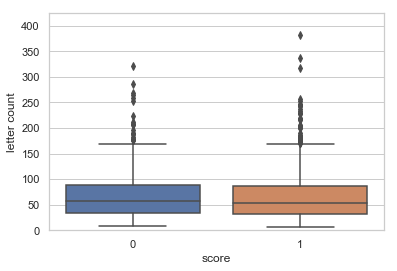

In [64]:
sns.boxplot(x = 'score', y = 'letter count', data = txt)
plt.ylim(0,425)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_tran=TfidfVectorizer()

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report

In [66]:
newd=data_tran.fit_transform(txt['sentiment'])
print(newd.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [67]:
newd.nnz

density=(100.0 * newd.nnz / (newd.shape[0] * newd.shape[1]))

y=txt['score']
density

0.21371684476991995

In [68]:
print("shape of review text",newd.shape)

shape of review text (2748, 5155)


In [69]:
print("shape of review text",y.shape)

shape of review text (2748,)


In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(newd, y, test_size=0.3, random_state=101)

In [71]:
nb = MultinomialNB()
nb.fit(xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
preds = nb.predict(xtest)

In [73]:
print(confusion_matrix(ytest, preds))
print('\n')
print(classification_report(ytest, preds))

[[334  78]
 [ 90 323]]


             precision    recall  f1-score   support

          0       0.79      0.81      0.80       412
          1       0.81      0.78      0.79       413

avg / total       0.80      0.80      0.80       825



In [74]:
data_tran.vocabulary_

{'so': 4161,
 'there': 4545,
 'is': 2427,
 'no': 3043,
 'way': 4987,
 'for': 1829,
 'me': 2809,
 'to': 4609,
 'plug': 3387,
 'it': 2432,
 'in': 2314,
 'here': 2158,
 'the': 4531,
 'us': 4835,
 'unless': 4793,
 'go': 1982,
 'by': 647,
 'converter': 1013,
 'good': 1993,
 'case': 713,
 'excellent': 1603,
 'value': 4861,
 'great': 2023,
 'jawbone': 2449,
 'tied': 4589,
 'charger': 768,
 'conversations': 1012,
 'lasting': 2567,
 'more': 2931,
 'than': 4526,
 '45': 45,
 'minutes': 2890,
 'major': 2753,
 'problems': 3482,
 'mic': 2868,
 'have': 2113,
 'jiggle': 2464,
 'get': 1954,
 'line': 2648,
 'up': 4821,
 'right': 3777,
 'decent': 1171,
 'volume': 4928,
 'if': 2282,
 'you': 5138,
 'several': 4004,
 'dozen': 1373,
 'or': 3144,
 'hundred': 2259,
 'contacts': 987,
 'then': 4542,
 'imagine': 2294,
 'fun': 1901,
 'of': 3097,
 'sending': 3968,
 'each': 1440,
 'them': 4538,
 'one': 3124,
 'are': 273,
 'razr': 3611,
 'owner': 3200,
 'must': 2980,
 'this': 4558,
 'needless': 3010,
 'say': 3889,
 '

##                                <(￣ ﹌ ￣)>